In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'data.json'

In [3]:
with open(dataset_path, 'r') as fp:
    data = json.load(fp)

In [4]:
inputs = np.array(data['mfcc'])
targets = np.array(data['labels'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)

In [21]:
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [28]:
X_train.shape

(3994, 259, 13, 1)

In [33]:
len(X_train[0])

259

In [45]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 257, 11, 32)       320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 129, 6, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 129, 6, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 127, 4, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 2, 32)        0         
 g2D)                                                            
                                                      

In [48]:
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          epochs=50,
          batch_size=32)

Epoch 1/50
125/125 [==============================] - 5s 35ms/step - loss: 2.3001 - accuracy: 0.1850 - val_loss: 2.0322 - val_accuracy: 0.2803
Epoch 2/50
125/125 [==============================] - 4s 34ms/step - loss: 1.9925 - accuracy: 0.2797 - val_loss: 1.8119 - val_accuracy: 0.3674
Epoch 3/50
125/125 [==============================] - 4s 34ms/step - loss: 1.8347 - accuracy: 0.3360 - val_loss: 1.6045 - val_accuracy: 0.4354
Epoch 4/50
125/125 [==============================] - 4s 34ms/step - loss: 1.7223 - accuracy: 0.3726 - val_loss: 1.4647 - val_accuracy: 0.4745
Epoch 5/50
125/125 [==============================] - 4s 34ms/step - loss: 1.6326 - accuracy: 0.3993 - val_loss: 1.3987 - val_accuracy: 0.5055
Epoch 6/50
125/125 [==============================] - 4s 34ms/step - loss: 1.5560 - accuracy: 0.4412 - val_loss: 1.3233 - val_accuracy: 0.5095
Epoch 7/50
125/125 [==============================] - 4s 34ms/step - loss: 1.4948 - accuracy: 0.4552 - val_loss: 1.2880 - val_accuracy: 0.5395

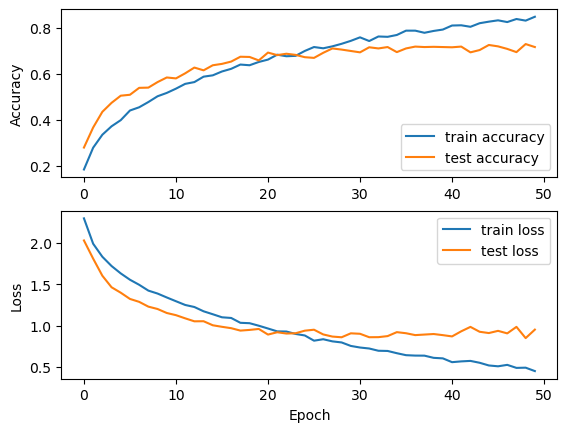

In [49]:
fig, axes = plt.subplots(2)

axes[0].plot(history.history["accuracy"], label="train accuracy")
axes[0].plot(history.history["val_accuracy"], label="test accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].legend(loc="lower right")

axes[1].plot(history.history["loss"], label="train loss")
axes[1].plot(history.history["val_loss"], label="test loss")
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epoch")
axes[1].legend(loc="upper right")

In [53]:
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis=1)

print("Expected: {} Predicted: {}".format(y_test, predicted_index))

40/40 [==============================] - 0s 9ms/step
Expected: [2 3 1 ... 4 1 2] Predicted: [2 3 1 ... 4 1 2]


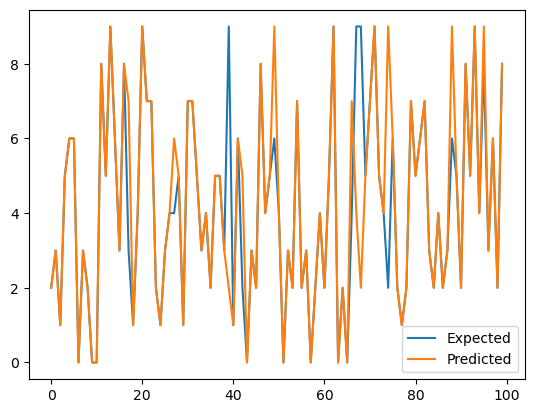

In [56]:
plt.plot(y_test[:100], label="Expected")
plt.plot(predicted_index[:100], label="Predicted")
plt.legend(loc="lower right")

In [57]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}'.format(test_accuracy))

40/40 [==============================] - 0s 7ms/step - loss: 0.3302 - accuracy: 0.9015
Accuracy: 0.9015212059020996
